In [15]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from halotools.mock_observables import rp_pi_tpcf, tpcf, s_mu_tpcf

sns.set_context('talk')

In [3]:
# Read in halos

# Read masses
data_dir = '/raid/nbody/baorsd/run101/halo_catalog/'
bins_dir = '/home/c-cuesta/CentralPairwiseVel/bins/'

snapshot = '/S020_cen_rockstar'

m200c = np.fromfile(data_dir + snapshot + '_mass.bin',
                    dtype=np.float32)

vel = np.fromfile(data_dir + snapshot + '_vel.bin',
                    dtype=np.float32)/100.

vel = vel.reshape((-1,3))

In [4]:
mass_bins = np.loadtxt(bins_dir + 'mass_bins.txt')

1.00E+13 < M < 1.49E+13
mean =  5.040615
std =  2.3628051
5.12E+13 < M < 8.71E+13
mean =  5.158976
std =  2.4065273
2.00E+14 < M < 4.21E+15
mean =  5.4800434
std =  2.6100414


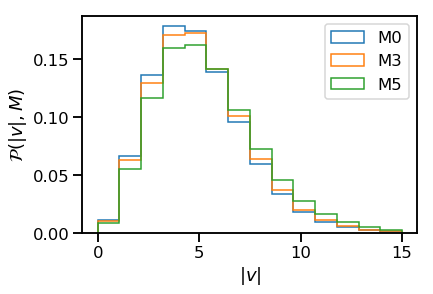

In [11]:
# Cut mass
bins = np.linspace(0,15,15)

list_mass = [0,3,5]
for m in list_mass:
    threshold = (m200c > mass_bins[m]) & (m200c < mass_bins[m+1])
    vel_modulous = np.linalg.norm(vel[threshold,:], axis = -1)
    print(f'{mass_bins[m]:.2E} < M < {mass_bins[m+1]:.2E}')
    print(r'mean = ', np.mean(vel_modulous))
    print(r'std = ', np.std(vel_modulous))
    plt.hist(vel_modulous, bins = bins, label = f'M{m}',
             density=True, histtype='step')
#plt.xlim(700, 1500)  
plt.ylabel(r'$\mathcal{P}(|v|, M)$')

plt.xlabel(r'$|v|$')
plt.legend()

In [9]:
# Plot the real space tpcf for each mass bin
mass_bins

array([1.00000072e+13, 1.49480224e+13, 2.84540703e+13, 5.12161554e+13,
       8.70626445e+13, 2.00000000e+14, 4.21370544e+15])

In [13]:
def compute_real_tpcf(box, snapshot, r_bins, mass_low, mass_high, boxsize = 2000.,  num_threads = 1):


    if(box == 15):
        filename = f'/raid/nbody/baorsd/run1{box:02d}/halo_catalog/R115_S{snapshot:03d}'
    else:
        filename = f'/raid/nbody/baorsd/run1{box:02d}/halo_catalog/S{snapshot:03d}_cen_rockstar'


    pos = np.fromfile(filename + '_pos.bin', dtype = np.float32)

    pos = np.reshape(pos, (-1, 3)) 

    m200c = np.fromfile(filename + '_mass.bin', dtype = np.float32)

    threshold = (m200c > mass_low) & (m200c < mass_high)

    pos = pos[threshold,:]
    
    real_tpcf = tpcf(pos, r_bins, period = boxsize, num_threads = num_threads)

    r_bins_c = 0.5*(r_bins[1:] + r_bins[:-1])

    return r_bins_c, real_tpcf


In [16]:
r_bins = np.logspace(-0.4, np.log10(150.), 100)

mass_real_tpcf = []

for i in range(len(mass_bins)-1):
    r_bins_c, real_tpcf = compute_real_tpcf(1, 20, r_bins, 
        mass_bins[i], mass_bins[i+1],num_threads = 16)
    mass_real_tpcf.append(real_tpcf)


Text(0.5, 0, 'r [Mpc/h]')

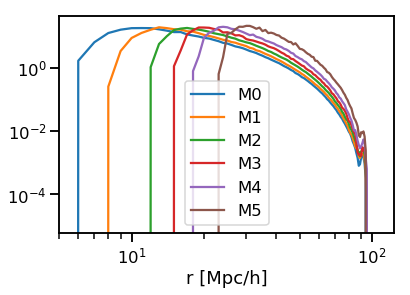

In [21]:
for i in range(len(mass_bins) - 1):
    plt.loglog(mass_real_tpcf[i],label = f'M{i}')
plt.legend()
plt.xlim(5)
plt.xlabel('r [Mpc/h]')